## K-means clustering

In [ ]:
import numpy as np
from sklearn import datasets
from scipy.spatial import distance_matrix

import matplotlib.pyplot as plt


We are going to use a random dataset of 2-D blobs to better illustrate clustering performance.

In [2]:
n_samples = 1500
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)


When implementing K-Means clustering we have many options with calculating the distances between points. Here we are using the distance_matrix function that efficiently computes the similarities between all points in the data and the cluster centroids.

When initializing the centroids for the algorithm we have two options. We can either select K random pairs of values for the initial centroids or randomly select K points from the training data. In this case we choose to go with the latter. Also, we want to stop iterating after reaching the total number of iterations or if we find that the cluster centroids have not moved more than a certain distance between iterations.

In [3]:
class KMeans:
    def __init__(self, k):
        self.k = k
        self.fitted = False

    def assign_clusters(self, X, centroids):
        dist_X = distance_matrix(X, centroids)  # default is euclidean
        return np.argmin(dist_X, axis=1)

    def compute_centroids(self, X, X_clusters):
        new_centroids = np.zeros((self.k, self.dim))
        for i in range(self.k):
            cluster_part = X[X_clusters == i]
            new_centroids[i] = np.mean(cluster_part, axis=0)
        return new_centroids

    def fit(self, X, num_iter=100, min_change=0.):
        self.n, self.dim = X.shape[0], X.shape[1]
        self.cluster_centroids = X[
            np.random.randint(low=0, high=self.n, size=self.k)
        ]  # randomly select k data points
        iter = 0
        centroid_change = float("inf")  # checks if centroids have changed
        while iter < num_iter and centroid_change > min_change:
            iter += 1
            X_clusters = self.assign_clusters(X, self.cluster_centroids)
            new_centroids = self.compute_centroids(X, X_clusters)
            centroid_change = np.linalg.norm(self.cluster_centroids - new_centroids)
            self.cluster_centroids = new_centroids
        
        self.fitted = True

    def predict(self, X):
        assert self.fitted
        return self.assign_clusters(X, self.cluster_centroids)


In [4]:
kmeans = KMeans(k=3)
kmeans.fit(X)

In [5]:
y_pred = kmeans.predict(X)

After the model is fitted we can now use the predict function to assign the test data points to the different clusters. We can then plot the test points colored by the assigend cluster. Since this is a fairly simple dataset we can fit the test data perfectly.

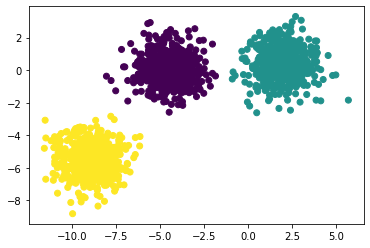

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred)